**Forecasting Stock Prices Using Time Series, Machine Learning, and Deep Learning Models**

*Introduction*

Forecasting stock prices is an increasingly critical and challenging task in financial markets due to the inherent volatility and complex dynamics of stock data. Accurate predictions enable investors, analysts, and policymakers to make informed decisions, minimizing risks and maximizing returns. The unpredictability of financial markets, compounded by various macroeconomic and geopolitical factors, makes forecasting stock prices both a science and an art. Traditional approaches such as the Autoregressive Integrated Moving Average (ARIMA) have long been the foundation of time series forecasting, providing robust predictions in stationary and linear contexts. However, the limitations of these methods in capturing non-linear and non-stationary patterns have driven a shift towards advanced machine learning and deep learning techniques, which are better suited to handle complex, high-dimensional datasets (Chatterjee et al., 2021; Yamak et al., 2019; Siami-Namini et al., 2019).

Modern methods like Long Short-Term Memory (LSTM) networks and Bidirectional LSTM (BiLSTM) have demonstrated superior capabilities in modelling long-term dependencies and non-linear patterns in financial data (Lawi et al., 2022). These architectures excel in recognizing temporal dependencies, making them highly effective for sequential data analysis. Additionally, models like Prophet, N-BEATS, and DeepAR have introduced innovations tailored for financial forecasting, leveraging probabilistic modelling, neural architectures, and attention mechanisms to enhance predictive accuracy (Salinas et al., 2020; Oreshkin et al., 2019; Taylor and Letham, 2018). Emerging techniques such as Temporal Convolutional Networks (TCN) and hybrid architectures combining GRU and attention mechanisms also offer promising alternatives, improving both efficiency and accuracy in processing large-scale data (Chen et al., 2024).

This study focuses on the forecasting of stock prices for ten leading companies: Microsoft Corp., Nvidia Corp., Alphabet Inc., Amazon.com Inc., Meta Platforms Inc., Taiwan Semiconductor Manufacturing Co. Ltd., ASML Holding NV, Adobe Inc., IBM, and Arista Networks Inc. These companies represent a significant portion of the technological and innovation-driven economy, often serving as indicators of broader market trends. Using data collected via the Yahoo Finance API, this research employs various forecasting models, including ARIMA, LSTM, BiLSTM, N-BEATS, Prophet, DeepAR, and TCN. Each model's effectiveness will be rigorously compared to identify the most suitable approach for stock price prediction (Pant et al., 2024).

Objectives

The objectives of this project are as follows:

- To evaluate and compare the performance of multiple time series forecasting models, including traditional, machine learning, and deep learning approaches, in predicting stock prices.

- To identify the most suitable forecasting model for predicting stock prices of the selected companies based on accuracy, robustness, and computational efficiency.

*Who Will Benifit*

The findings of this project will benefit the following stakeholders:

- Investors: By providing accurate predictions, investors can make more informed decisions about buying, holding, or selling stocks, thereby minimizing risks and maximizing returns. This project will also help retail investors understand the application of advanced predictive models.

- Financial Analysts: The study will offer a comparative analysis of forecasting models, helping analysts understand the strengths and limitations of different approaches, thereby enhancing their analytical toolkits.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


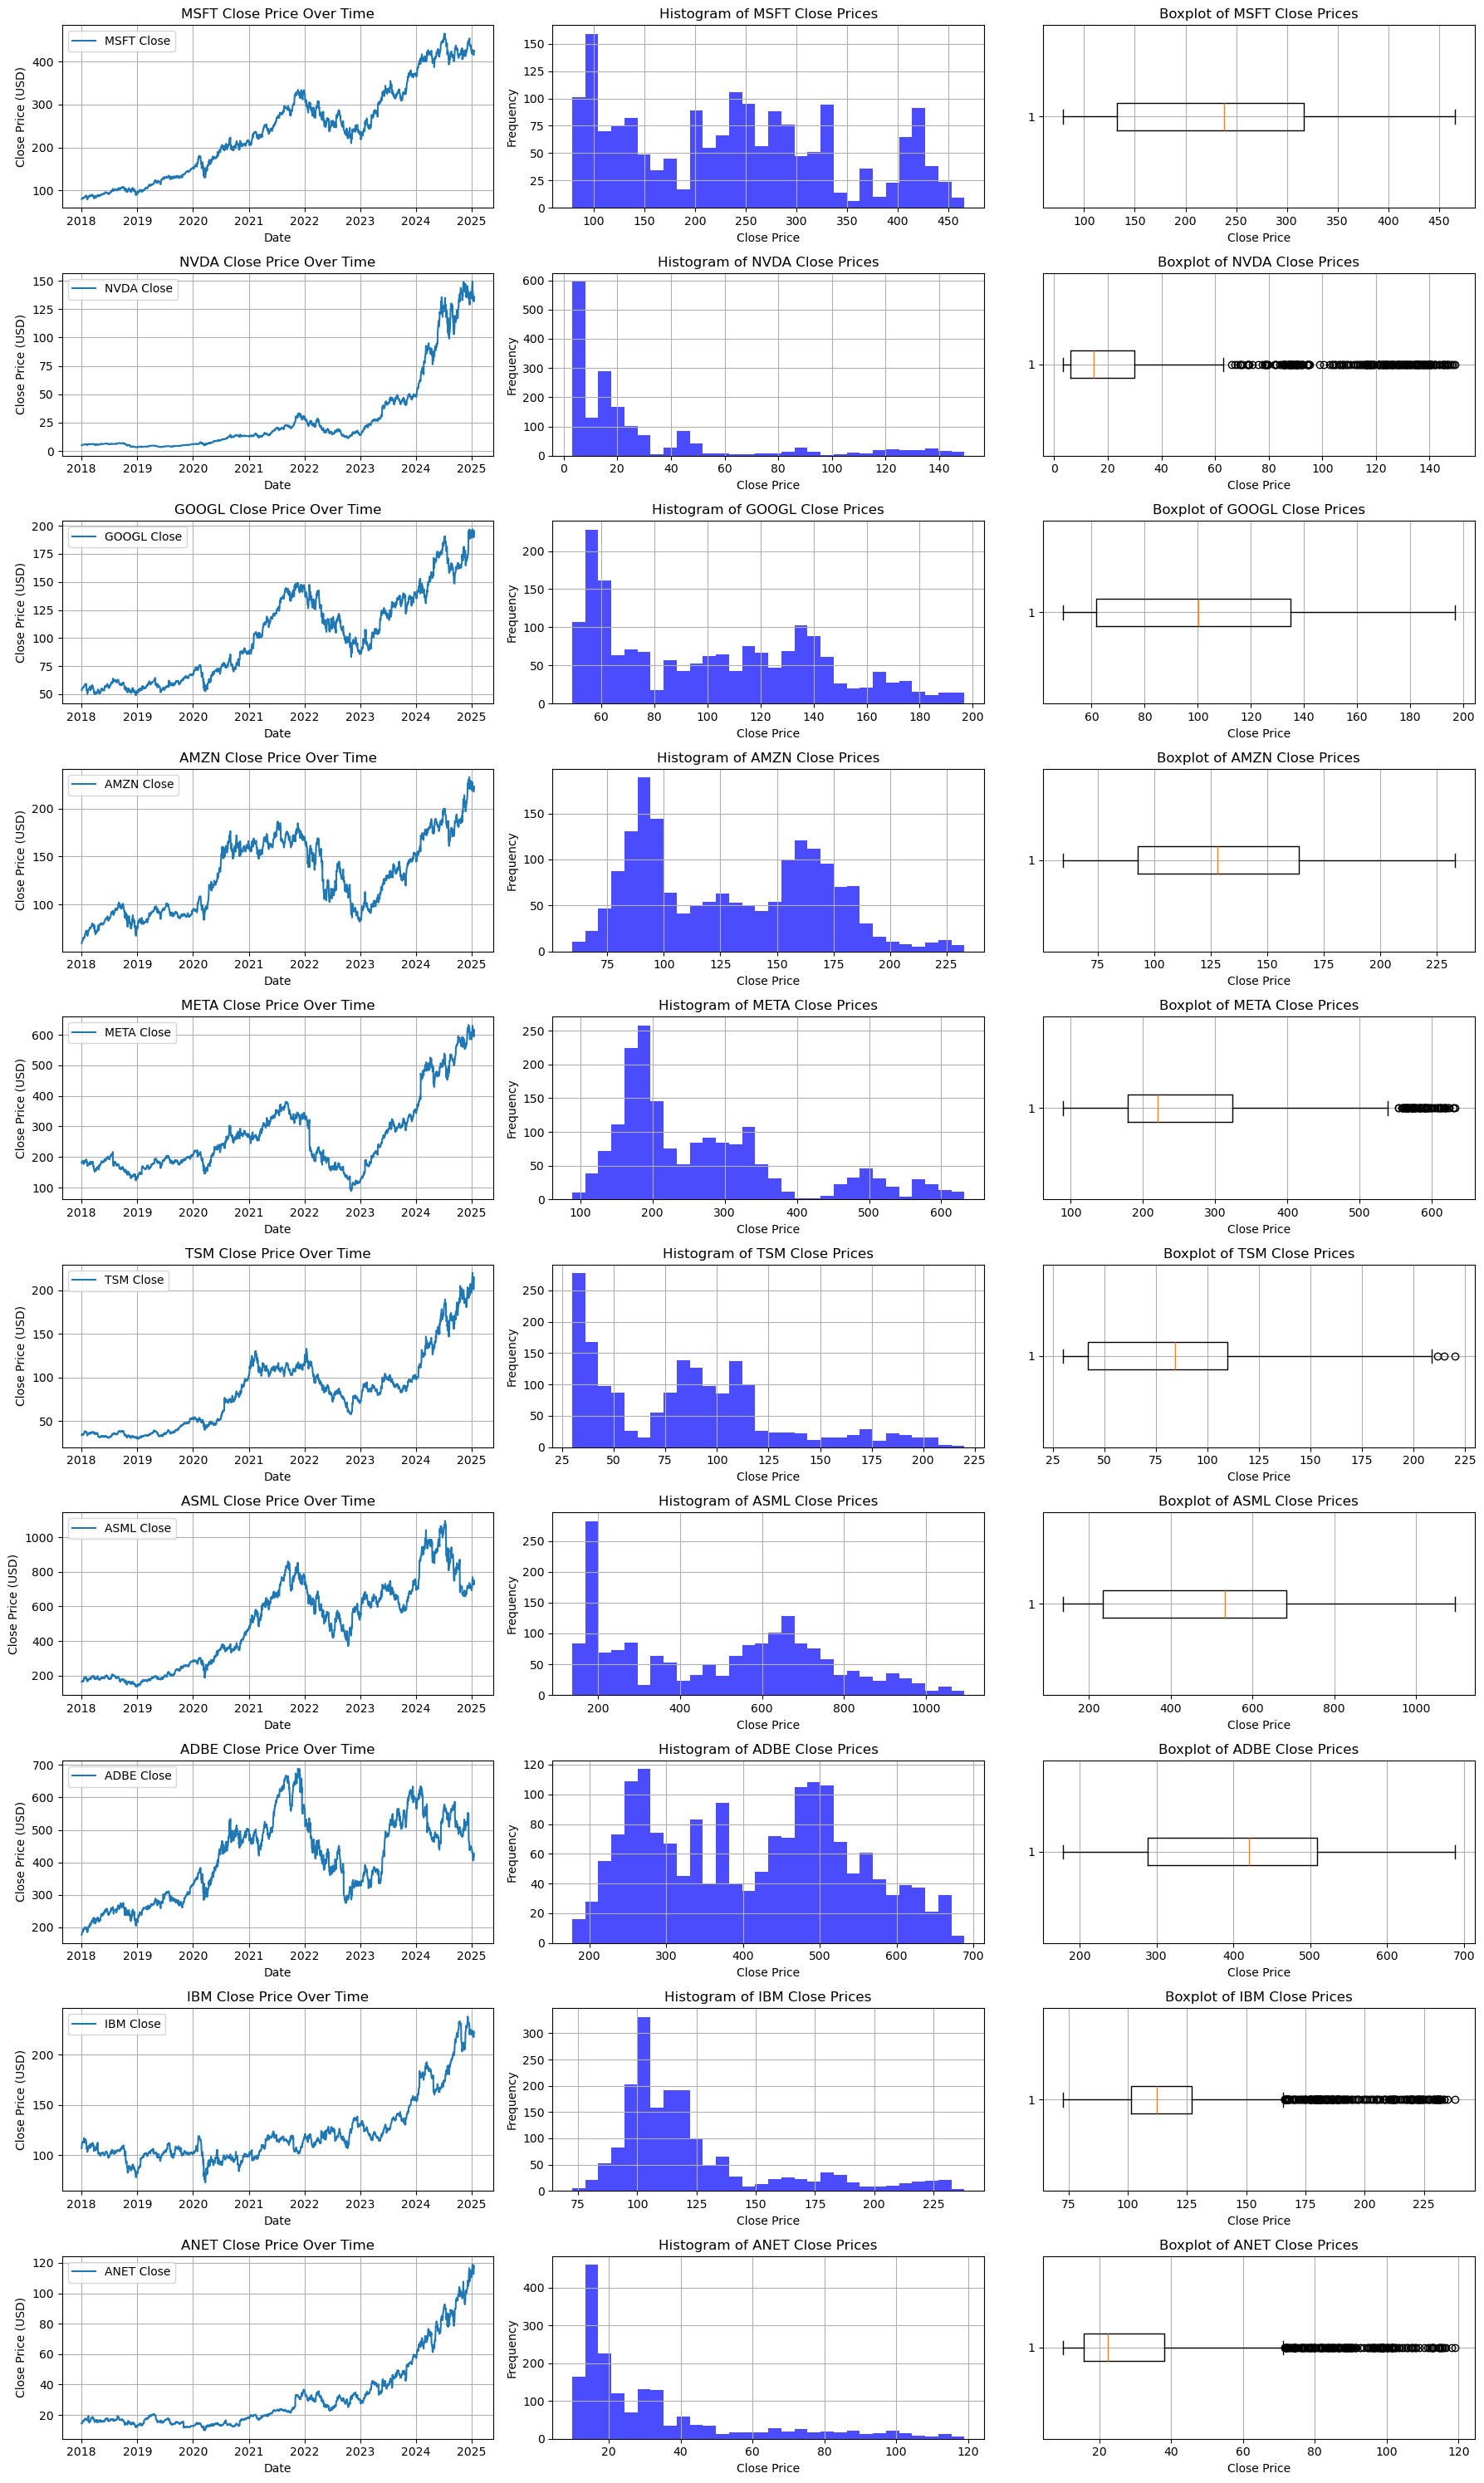

Summary statistics for all tickers:
Ticker         MSFT         NVDA        GOOGL         AMZN         META  \
count   1771.000000  1771.000000  1771.000000  1771.000000  1771.000000   
mean     238.769089    29.523194   101.761880   129.829956   266.845574   
std      107.883405    36.501372    39.426953    39.373357   122.495093   
min       78.762581     3.151429    49.055672    59.450500    88.571663   
25%      132.615005     6.157182    61.598698    92.820999   178.692406   
50%      238.080063    14.738280   100.067253   127.820000   220.477783   
75%      317.130936    30.029057   134.793106   163.927498   324.126862   
max      465.786438   149.429993   196.869995   232.929993   632.170044   

Ticker          TSM         ASML         ADBE          IBM         ANET  
count   1771.000000  1771.000000  1771.000000  1771.000000  1771.000000  
mean      84.438745   495.977144   411.181045   122.353625    32.478618  
std       43.745798   251.256756   127.242461    33.258155    24.6

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# tickers
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = '2018-01-01'

def download_data(tickers, start):
    all_data = {}
    data = pd.DataFrame()   
    for ticker in tickers:
        #print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data=pd.concat([data,df['Close']],axis=1)
    return data

# Download the data
data_df = download_data(tickers, start_date)

# storing the data in a csv file
#data_df.to_csv('data.csv')

# a grid layout of the plots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18, 30))
axes = axes.flatten()

# plots
for i, ticker in enumerate(tickers):
    # Line plot
    axes[i*3].plot(data_df.index, data_df[ticker], label=f"{ticker} Close")
    axes[i*3].set_title(f"{ticker} Close Price Over Time")
    axes[i*3].set_xlabel("Date")
    axes[i*3].set_ylabel("Close Price (USD)")
    axes[i*3].legend()
    axes[i*3].grid()

    # histogram
    axes[i*3+1].hist(data_df[ticker].dropna(), bins=30, color='blue', alpha=0.7)
    axes[i*3+1].set_title(f"Histogram of {ticker} Close Prices")
    axes[i*3+1].set_xlabel("Close Price")
    axes[i*3+1].set_ylabel("Frequency")
    axes[i*3+1].grid()

    # boxplot
    axes[i*3+2].boxplot(data_df[ticker].dropna(), vert=False)
    axes[i*3+2].set_title(f"Boxplot of {ticker} Close Prices")
    axes[i*3+2].set_xlabel("Close Price")
    axes[i*3+2].grid()


plt.tight_layout()
plt.show()

print("Summary statistics for all tickers:")
print(data_df.describe())

In [8]:
# the number of missing values
data_df.isnull().sum()

Ticker
MSFT     0
NVDA     0
GOOGL    0
AMZN     0
META     0
TSM      0
ASML     0
ADBE     0
IBM      0
ANET     0
dtype: int64

The data contains no missing values. 

<Axes: xlabel='Date'>

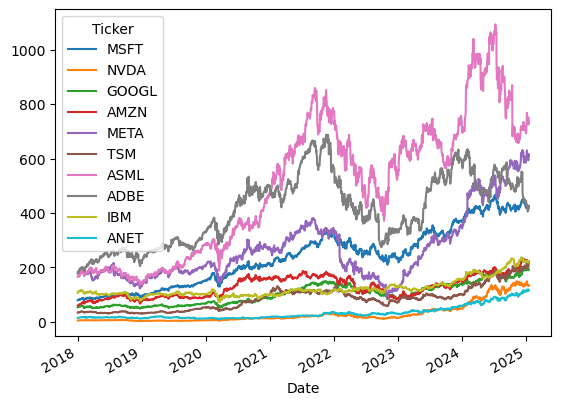

In [9]:
data_df.plot()

In the plot above we can see that almost all the companies suffer from a decline in their stock price inaround 2022 which could be due to COVID. A suggestion could be that the models and analysis is beeter to start after the COVID decline. 

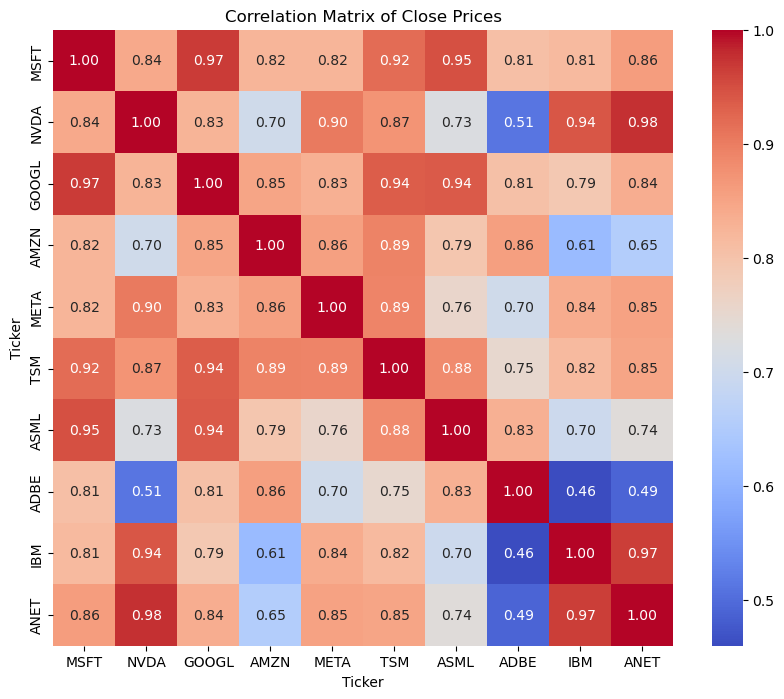

Ticker      MSFT      NVDA     GOOGL      AMZN      META       TSM      ASML  \
Ticker                                                                         
MSFT    1.000000  0.842541  0.966521  0.822981  0.824514  0.918028  0.948623   
NVDA    0.842541  1.000000  0.826092  0.704225  0.904089  0.871358  0.725193   
GOOGL   0.966521  0.826092  1.000000  0.849018  0.832395  0.935356  0.938356   
AMZN    0.822981  0.704225  0.849018  1.000000  0.855464  0.894051  0.793532   
META    0.824514  0.904089  0.832395  0.855464  1.000000  0.891345  0.756908   
TSM     0.918028  0.871358  0.935356  0.894051  0.891345  1.000000  0.883114   
ASML    0.948623  0.725193  0.938356  0.793532  0.756908  0.883114  1.000000   
ADBE    0.806711  0.510532  0.805623  0.858528  0.702989  0.753058  0.831994   
IBM     0.814674  0.941614  0.789794  0.613886  0.837863  0.815859  0.697795   
ANET    0.859390  0.976659  0.835831  0.654862  0.854316  0.848679  0.735989   

Ticker      ADBE       IBM      ANET  


In [10]:
correlation_matrix = data_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Close Prices")
plt.show()
print(correlation_matrix)

The stock prices are highly correlated to each other.

**Chapter 3: Literature Review**

Forecasting stock prices has evolved significantly, driven by the need to address the complexities and volatility of financial markets. Traditional methods like the Autoregressive Integrated Moving Average (ARIMA) have been foundational for modeling linear time series patterns, but their limitations in handling non-linearity and non-stationarity have prompted a shift toward machine learning (ML) and deep learning (DL) approaches. This review provides a comprehensive synthesis of existing literature, highlighting key advancements, limitations, and lessons relevant to forecasting stock prices for leading technology companies such as Microsoft, Nvidia, Alphabet, and others.

*Focused Literature Review Relevant to the Research Questions*

This research aims to evaluate the performance of traditional, ML, and DL models in financial forecasting, addressing their effectiveness, limitations, and suitability for predicting stock prices.

*Traditional Statistical Models*

ARIMA has been extensively used for financial forecasting due to its simplicity and effectiveness in linear, stationary data scenarios (Siami-Namini et al., 2019)A Comparative Analysis …. Seasonal ARIMA (SARIMA) variants incorporate seasonality to enhance predictive power (Chen et al., 2024)An improved deep tempor…. However, these models often fail to capture the non-linear, chaotic dynamics of stock prices, making them less suitable for long-term or complex forecasting.

*Machine Learning Approaches*

ML techniques like Support Vector Machines (SVMs), Random Forest (RF), and eXtreme Gradient Boosting (XGBoost) offer flexibility in modeling non-linear relationships (Lawi et al., 2022; Chauhan et al., 2021)Implementation of Long …Indian Stock Market Pre…. Hybrid methods, such as ARIMA-LS-SVM, achieve improved accuracy by integrating statistical and ML models. However, their reliance on feature engineering, sequential dependency limitations, and high computational costs constrain their utility in time series forecasting.

*Deep Learning Models*
DL approaches have revolutionized financial forecasting with their ability to handle high-dimensional, sequential data. Recurrent Neural Networks (RNNs) and their advanced variants, Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU), excel in capturing temporal dependencies and non-linear patterns (Chen et al., 2024; Lawi et al., 2022)

•	*LSTM and GRU*: LSTMs are particularly effective for long-term dependencies, while GRUs, with fewer parameters, offer computational efficiency for resource-constrained environments (Yavasani and Wang, 2023; Chen et al., 2024)

•	*BiLSTM*: Bidirectional LSTM (BiLSTM) models improve accuracy by processing sequences in forward and backward directions, enabling better context understanding (Siami-Namini et al., 2019; Patel et al., 2020)A Comparative Analysis …Comparative Study of Pr….

*Emerging DL Models*

Innovative architectures such as N-BEATS, DeepAR, and Temporal Convolutional Networks (TCNs) have expanded the 

*DL landscape*:

•	Prophet: Designed for ease of use, Prophet integrates domain knowledge for accurate predictions in business contexts (Taylor and Letham, 2018)forecasting at scale.

•	N-BEATS: This interpretable neural network excels in decomposing trend and seasonality, achieving state-of-the-art performance on benchmark datasets (Oreshkin et al., 2019).

•	DeepAR: A probabilistic model based on RNNs, DeepAR effectively handles large-scale time series datasets (Salinas et al., 2020).

•	TCNs: Temporal Convolutional Networks offer efficiency in capturing long-term dependencies, with faster training and greater stability than RNNs (Chen et al., 2024; Lea et al., 2017).

Limitations of Available Solutions and Approaches
While these advancements have pushed the boundaries of financial forecasting, each method has its limitations:

1.	Traditional Models:
-	Struggle with non-linear and non-stationary data prevalent in financial markets.

-	Limited scalability for high-dimensional and long-term forecasting tasks.

-	Dependence on data preprocessing to meet linearity and stationarity assumptions.

2.	*Machine Learning Models*:

-	Heavy reliance on feature engineering and domain expertise.

-	Inability to capture temporal dependencies effectively, particularly in longer sequences.

-	Computationally expensive tuning processes.

3.	*Deep Learning Models*:

-	Require large datasets and extensive computational resources.

-	High risk of overfitting with complex architectures.

-	Lack of interpretability can hinder trust in decision-making contexts.

4.	*Hybrid and Emerging Models*:

-	Hybrid approaches demand significant manual tuning, making them resource-intensive.

-	Probabilistic models like DeepAR depend on the availability of large-scale datasets.

**Summary of Lessons from the Literature**

1.	*Model Selection and Customization*:

-	DL models such as LSTM, GRU, and BiLSTM excel in capturing temporal dependencies and non-linearities.

-	Emerging architectures like N-BEATS and TCNs provide enhanced scalability and interpretability.

2.	*Data Challenges*:
-	Incorporating external factors like macroeconomic indicators and market sentiment improves predictive accuracy.

-	Robust preprocessing techniques (e.g., normalization and deseasonalization) are crucial for handling raw data.

3.	*Evaluation Metrics and Probabilistic Insights*:

-	While common metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE) measure accuracy, probabilistic forecasts (e.g., DeepAR) offer valuable insights into uncertainties.

4.	Ensemble and Hybrid Approaches:

-	Combining models or creating ensembles often yields better results than relying on single architectures.



**Data Source and Description**

The data utilized for this research was retrieved from Yahoo Finance, a widely recognized source for financial datasets. The dataset includes historical stock prices of ten leading technology companies: Microsoft Corp. (MSFT), Nvidia Corp. (NVDA), Alphabet Inc. (GOOGL), Amazon.com Inc. (AMZN), Meta Platforms Inc. (META), Taiwan Semiconductor Manufacturing Co. Ltd. (TSM), ASML Holding NV (ASML), Adobe Inc. (ADBE), International Business Machines Corp. (IBM), and Arista Networks Inc. (ANET). 

Each dataset encompasses various financial attributes, such as:

-	Open: The stock's opening price for a given trading day.

-	High: The highest price of the stock for the trading day.

-	Low: The lowest price of the stock for the trading day.

-	Close: The stock's closing price.

-	Volume: The number of shares traded during the day.

-	Adj Close (adjusted closing price): Historical data adjusted for stock splits, dividends, and rights offerings.


However, the newer versions of Yahoo Finance’s API do not include an explicit "Adj Close" column. Therefore, we rely on the "Close" column as the primary variable for analysis and forecasting. This focus ensures uniformity and compatibility across all datasets.

4.2 *Classification of Variables*
The variables in the dataset can be classified into two categories:

1.	*Independent Variables*:
-	Volume

-	High

-	Low

-	Open


2.	Dependent Variable:

-	Close (used as the target for forecasting models)


This classification allows us to analyze how trading volume and price movements during the day influence the closing prices of the stocks.


4.3 *Data Import and Cleaning*

The data cleaning process ensures the integrity and usability of the dataset for analysis and modeling. Below are the steps undertaken:

1.	*Data Import*: Using the yfinance library in Python, historical stock data for the ten companies was downloaded programmatically. The code snippet below illustrates the data import process:




In [11]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = ['MSFT', 'NVDA', 'GOOGL', 'AMZN', 'META', 'TSM', 'ASML', 'ADBE', 'IBM', 'ANET']
data = {}

# Download data for each ticker
for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2010-01-01', end='2024-12-31')

# Store data in a dictionary
stocks_df = {ticker: data[ticker][['Open', 'High', 'Low', 'Close', 'Volume']] for ticker in tickers}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Data Cleaning**

1.	*Handling Missing Values*:

-	Missing values were identified and filled using forward fill (propagating the last valid observation forward).

-	Stocks with extensive missing data were excluded or analyzed individually to ensure their absence did not bias results.


In [12]:
for ticker in stocks_df:
    stocks_df[ticker].fillna(method='ffill', inplace=True)


/var/folders/vc/3kfwh15d7234657gp2jqxqj80000gn/T/ipykernel_51253/2102796028.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_df[ticker].fillna(method='ffill', inplace=True)


2.	Outlier Detection and Treatment:

-	Boxplot Analysis: Outliers in the "Close" column were identified using boxplots. Stocks like NVDA displayed noticeable outliers.

-	Decision: Since the dataset represents time series data, removing outliers may disrupt trends. Instead, transformations (e.g., logarithmic scaling) were considered where necessary.


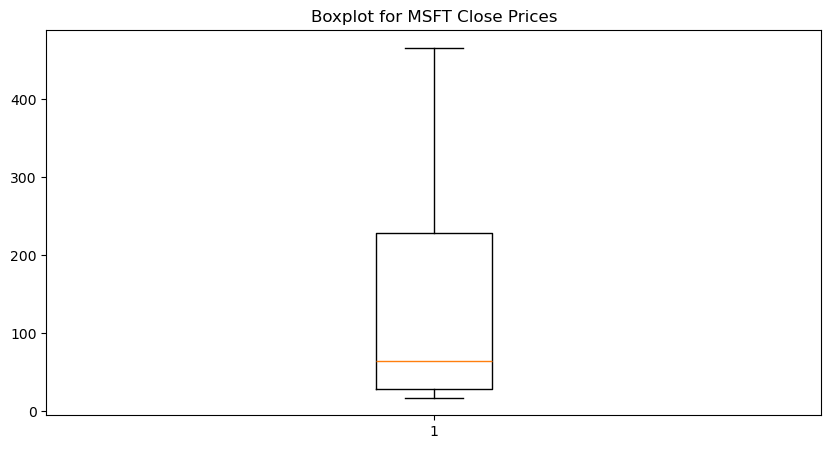

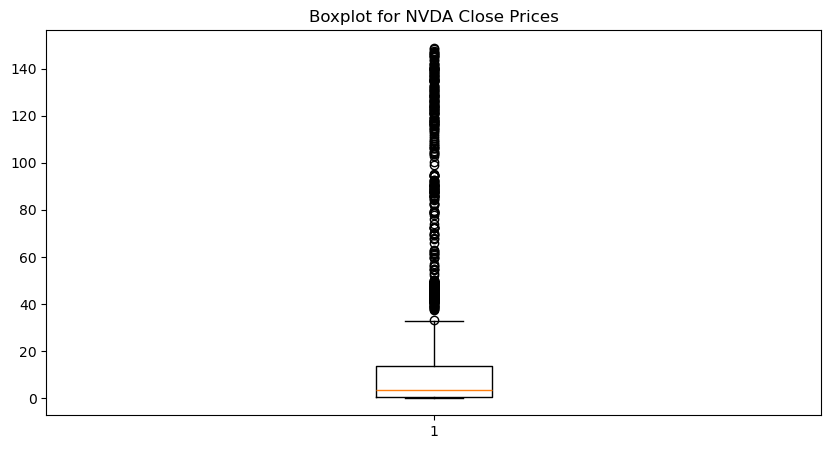

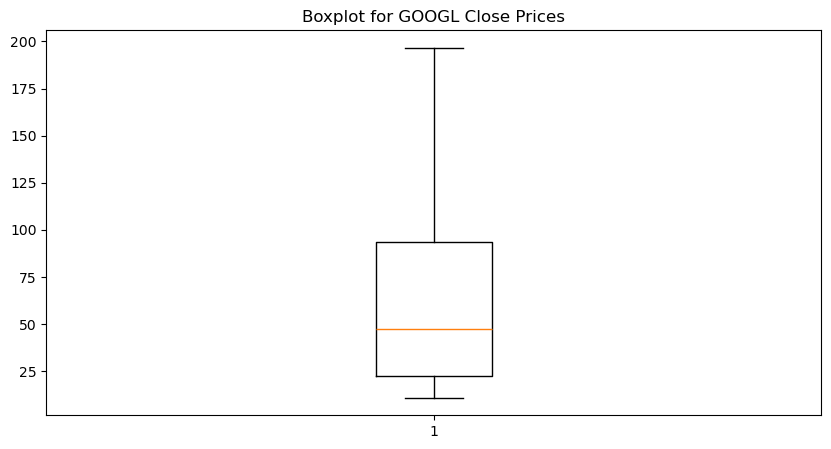

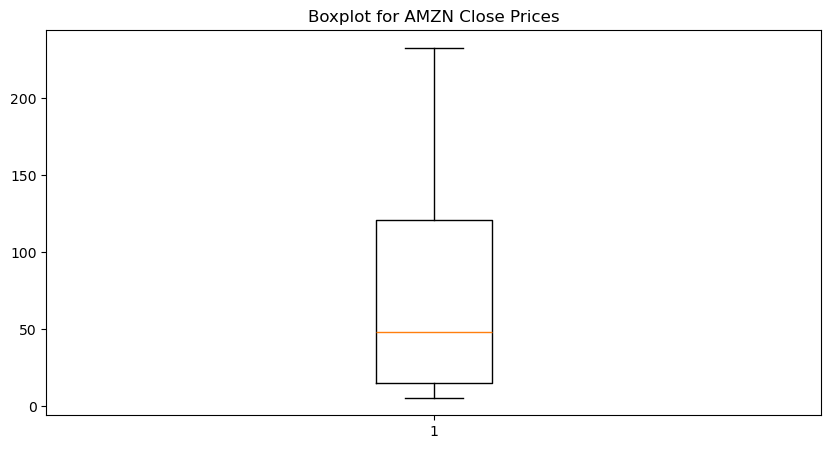

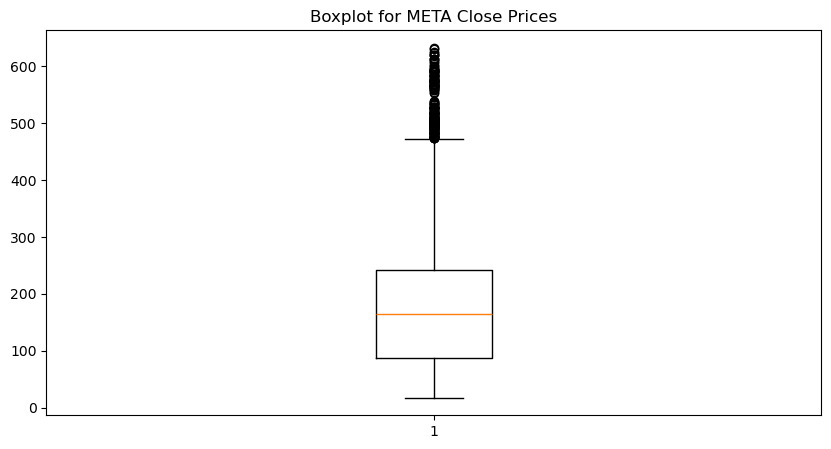

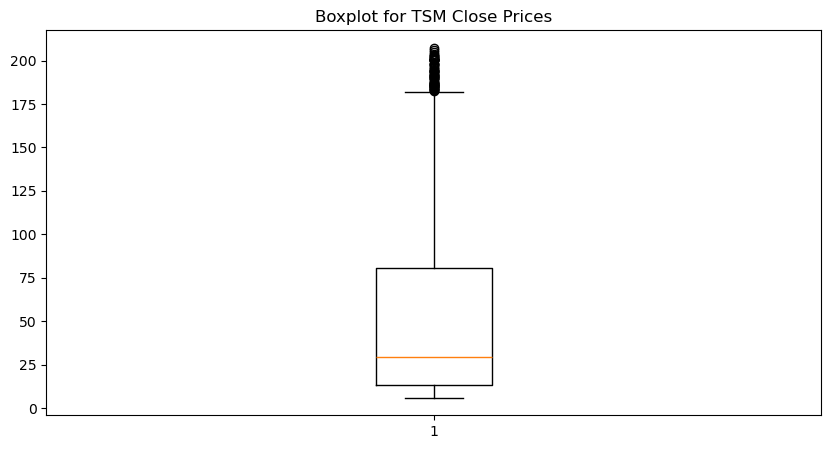

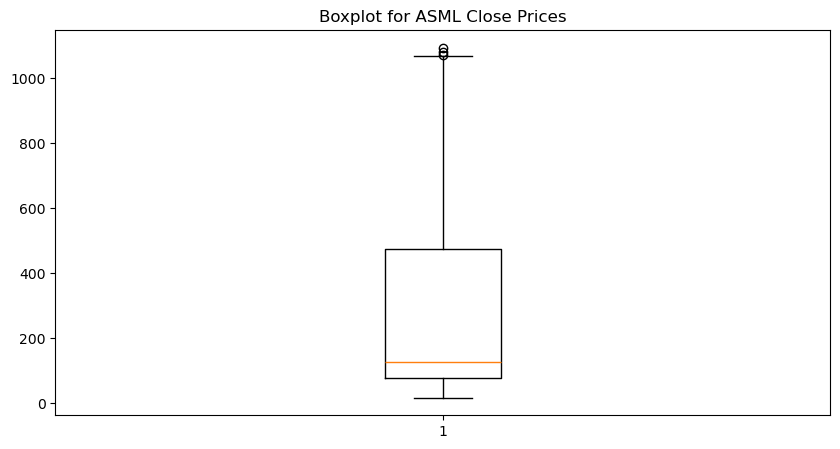

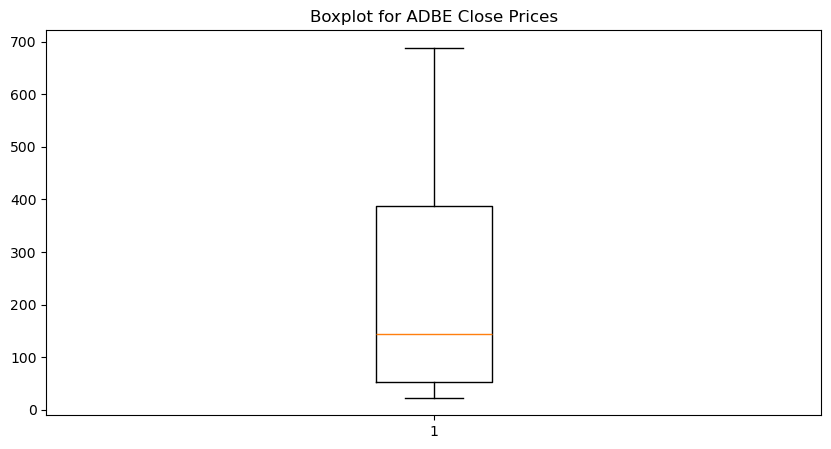

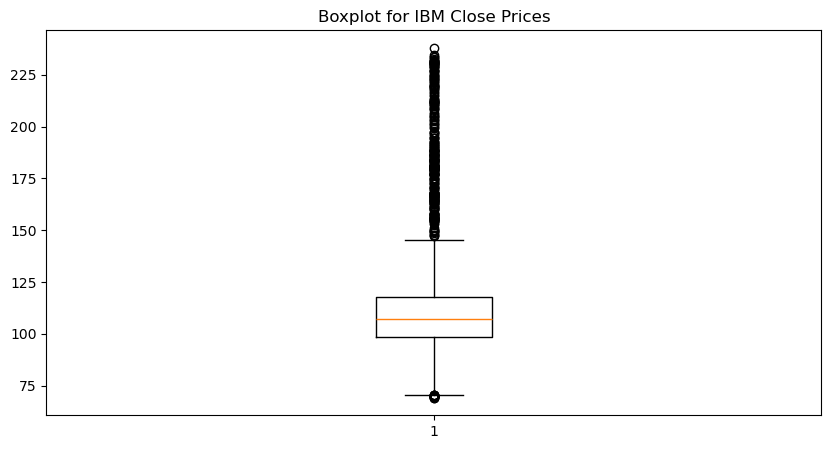

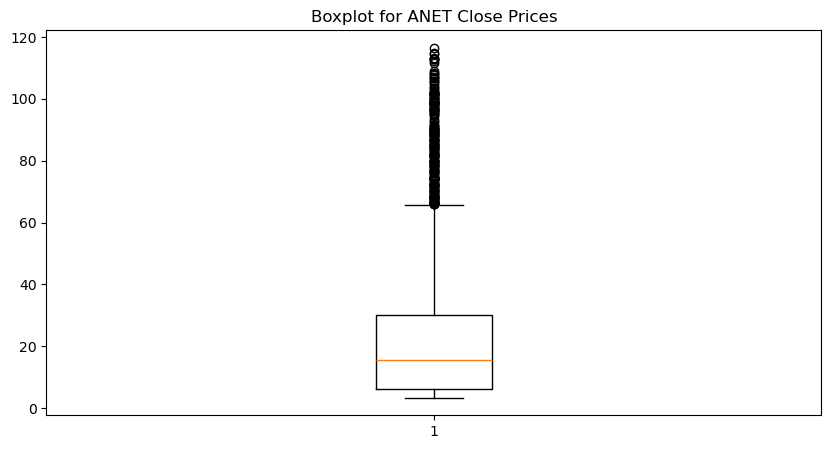

In [16]:
import matplotlib.pyplot as plt
#Boxplot for outlier detection

for ticker in stocks_df:
    plt.figure(figsize=(10, 5))
    plt.title(f"Boxplot for {ticker} Close Prices")
    plt.boxplot(stocks_df[ticker]['Close'].dropna())
plt.show()



3. Stationarity Check:

Stationarity tests, such as the Augmented Dickey-Fuller (ADF) test, were conducted to determine if the time series data required differencing or detrending.


In [14]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Returns True if stationary

for ticker in stocks_df:
    print(f"{ticker} Stationarity: {check_stationarity(stocks_df[ticker]['Close'])}")

MSFT Stationarity: False
NVDA Stationarity: False
GOOGL Stationarity: False
AMZN Stationarity: False
META Stationarity: False
TSM Stationarity: False
ASML Stationarity: False
ADBE Stationarity: False
IBM Stationarity: False
ANET Stationarity: False




Data Integration

For comparative analysis, a consolidated dataset was created by merging the data for all tickers into a multi-index DataFrame:



In [36]:
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = '2010-01-01'

def download_data(tickers, start):
    all_data = {}
    data = pd.DataFrame()   
    for ticker in tickers:
        #print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data=pd.concat([data,df['Close']],axis=1)
    return data

# Download the data
data_df = download_data(tickers, start_date)
data_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker,MSFT,NVDA,GOOGL,AMZN,META,TSM,ASML,ADBE,IBM,ANET
Date,,,,,,,,,,
2010-01-04,23.300678,0.423923,15.627781,6.6950,NaN,7.353935,23.667082,37.090000,74.764549,NaN
2010-01-05,23.308210,0.430113,15.558962,6.7345,NaN,7.322184,23.851440,37.700001,73.861420,NaN
2010-01-06,23.165163,0.432864,15.166741,6.6125,NaN,7.296782,24.069950,37.619999,73.381607,NaN
2010-01-07,22.924255,0.424381,14.813666,6.5000,NaN,7.055459,23.400772,36.889999,73.127617,NaN
2010-01-08,23.082355,0.425298,15.011148,6.6760,NaN,7.049110,22.840847,36.689999,73.861420,NaN


## Chapter 5: Data Exploration



### 5.1 Univariate Analysis
Univariate analysis focuses on examining the statistical properties and distribution of individual variables in the dataset, particularly the "Close" prices for each company. This analysis helps identify trends, patterns, and outliers within the data.

#### 1- Summary Statistics:

For each company's "Close" prices, key metrics such as mean, median, standard deviation, minimum, and maximum values were calculated to understand the central tendency and dispersion.

<Axes: title={'center': 'Summary Statistics of Close Prices'}>

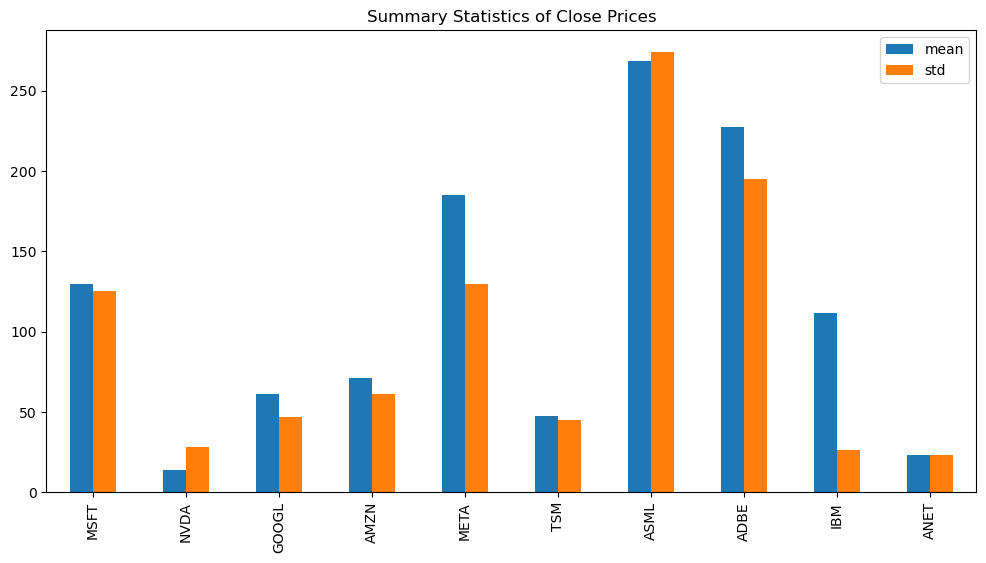

In [35]:
import pandas as pd

summary_df = pd.DataFrame()

for ticker in stocks_df:
    stats = stocks_df[ticker]['Close'].describe()
    summary_df[ticker] = stats  # Add statistics as a column for each company

summary_df = summary_df.T

#print(summary_df)
summary_df
#summary_df.to_csv("summary_statistics.csv")

summary_df.drop(columns=["count","max","25%","75%","50%","min"]).plot(kind='bar', figsize=(12, 6), title='Summary Statistics of Close Prices')


#### Histograms:

Histograms were used to visualize the distribution of "Close" prices, identifying the frequency of different price ranges.

<Axes: title={'center': 'Histogram of Prices'}, ylabel='Frequency'>

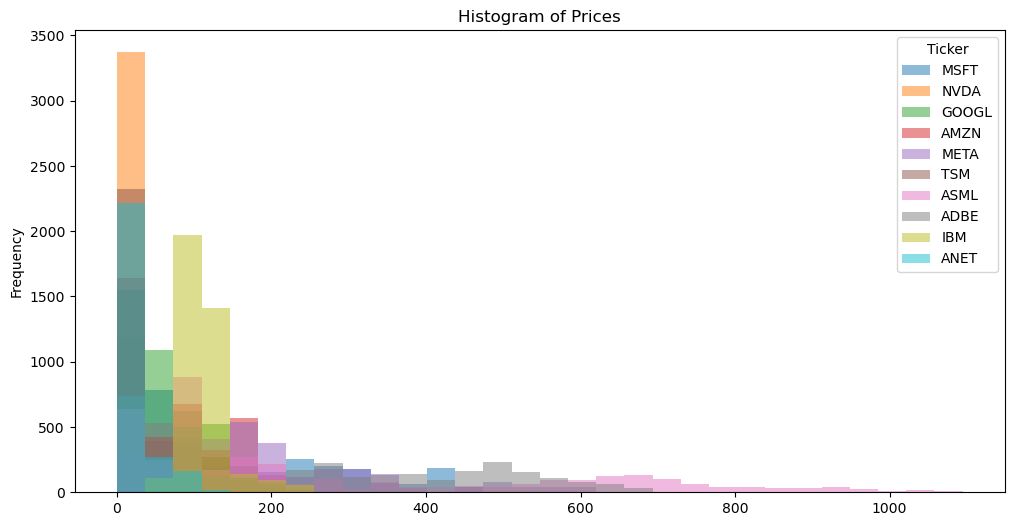

In [42]:
import matplotlib.pyplot as plt

# for ticker in data_df:
#     plt.figure(figsize=(10, 5))
#     plt.hist(data_df[ticker]['Close'], bins=30, alpha=0.7, color='blue')
#     plt.title(f"Histogram of {ticker} Close Prices")
#     plt.xlabel("Close Price")
#     plt.ylabel("Frequency")
#     plt.show()
# type(data_df) 
data_df.plot(kind='hist', bins=30, alpha=0.5,  figsize=(12, 6), title='Histogram of Prices')

#### Boxplots:

Boxplots were created to highlight the variability and detect potential outliers within the "Close" prices.

<Axes: title={'center': 'Boxplot of Prices'}>

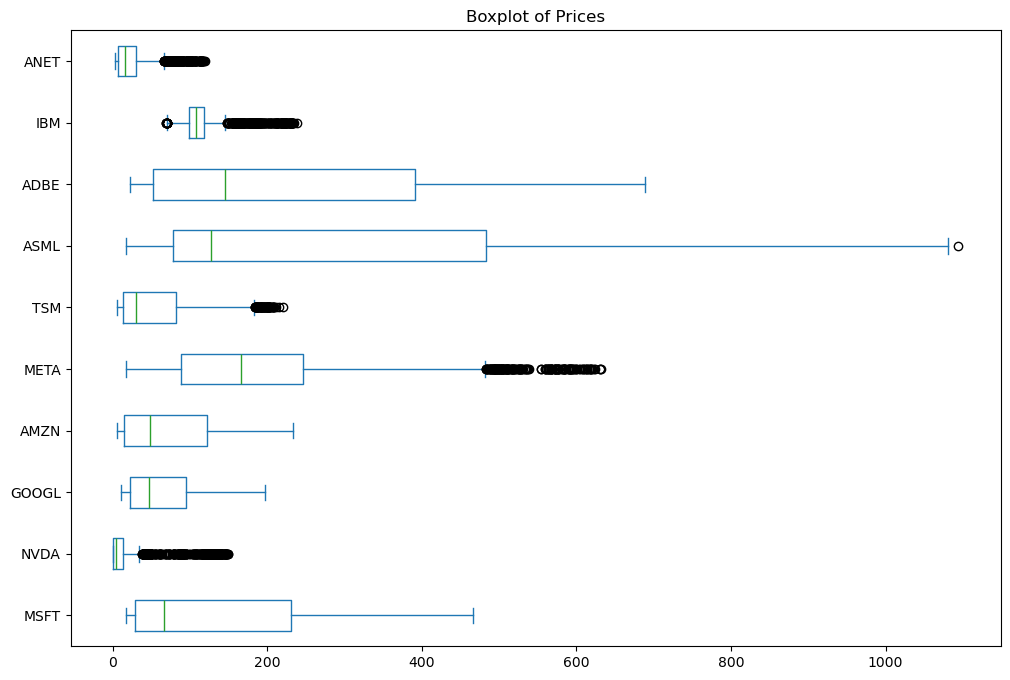

In [46]:
# for ticker in stocks_df:
#     plt.figure(figsize=(10, 5))
#     plt.boxplot(stocks_df[ticker]['Close'], vert=False)
#     plt.title(f"Boxplot of {ticker} Close Prices")
#     plt.xlabel("Close Price")
#     plt.show()

data_df.plot(kind='box', vert=False, figsize=(12, 8), title='Boxplot of Prices')

#### Time Series Plots:

Time series plots of "Close" prices were generated to observe trends, seasonality, and volatility over time.

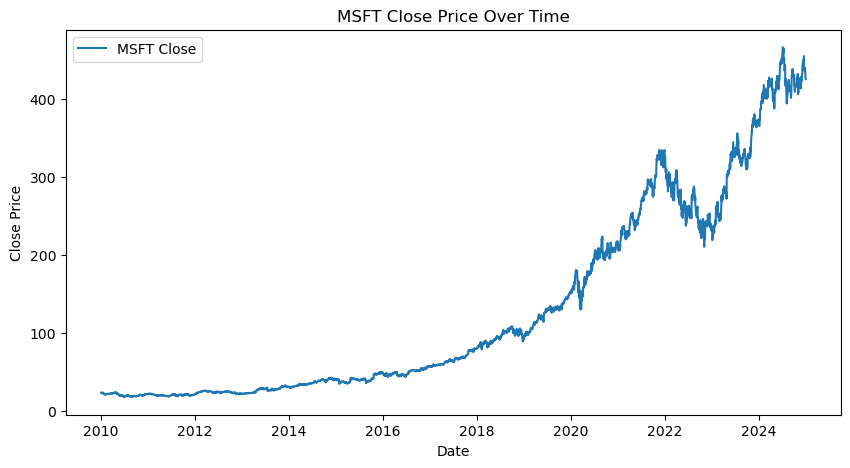

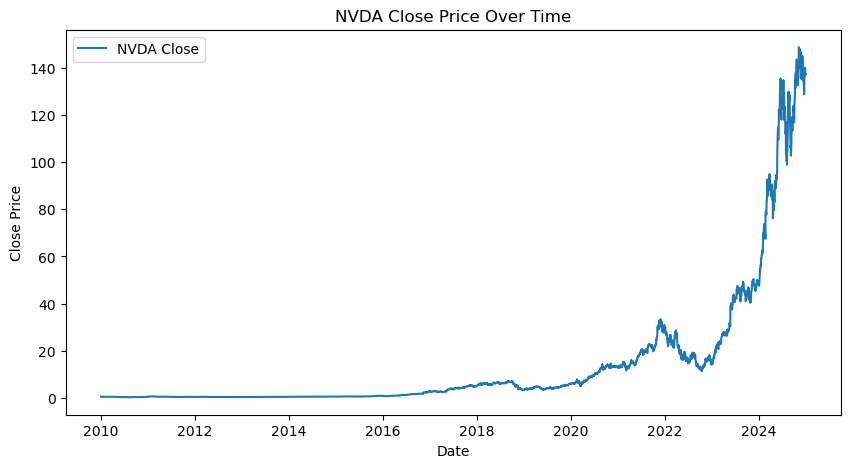

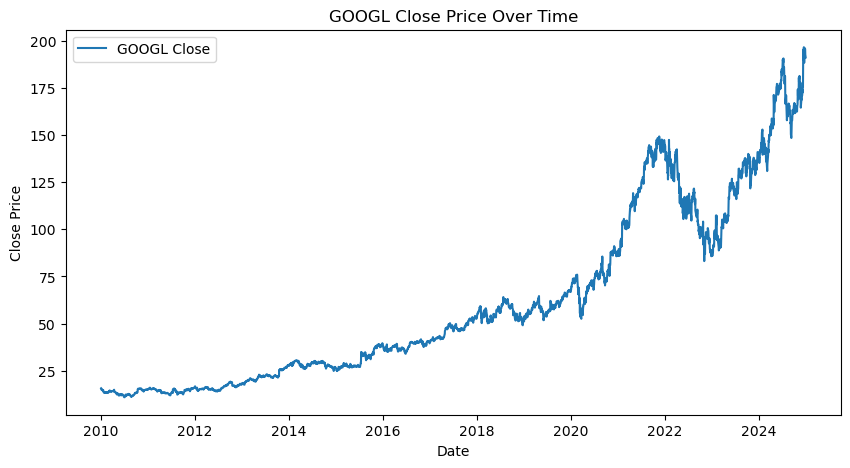

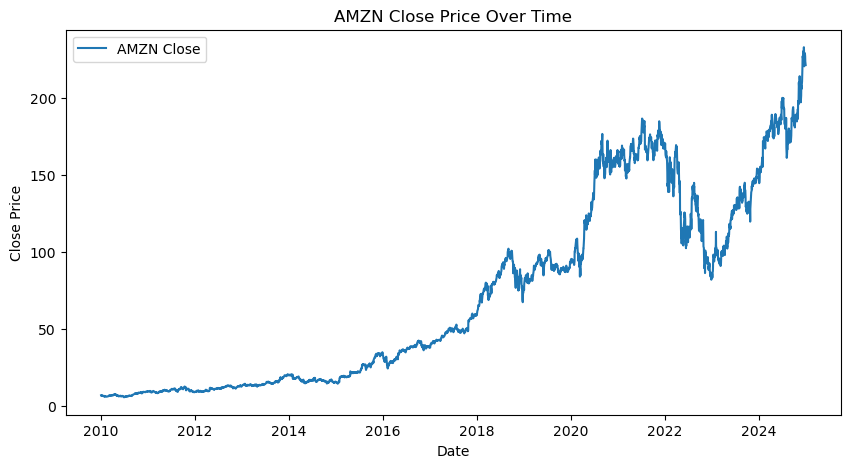

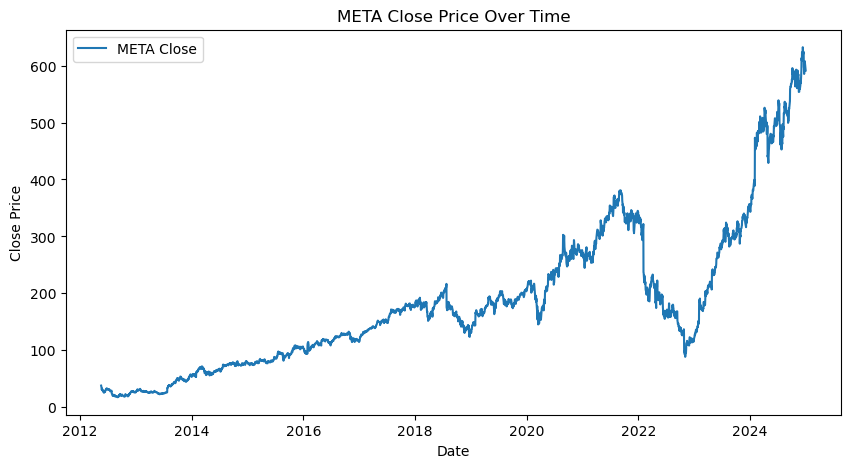

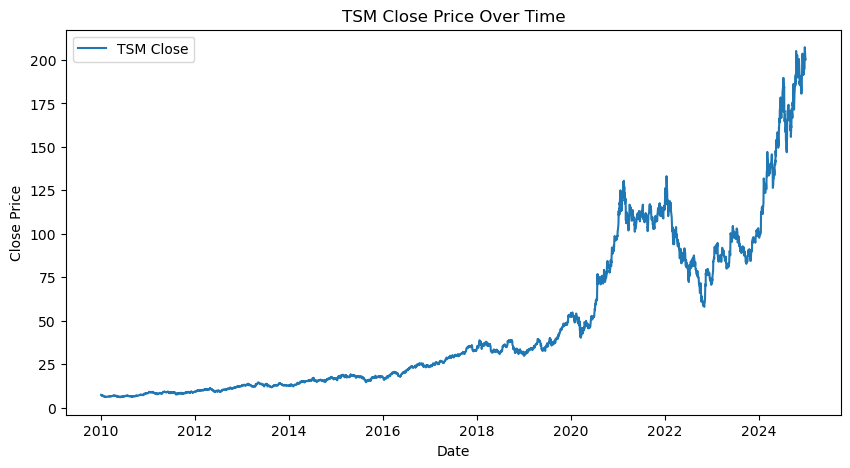

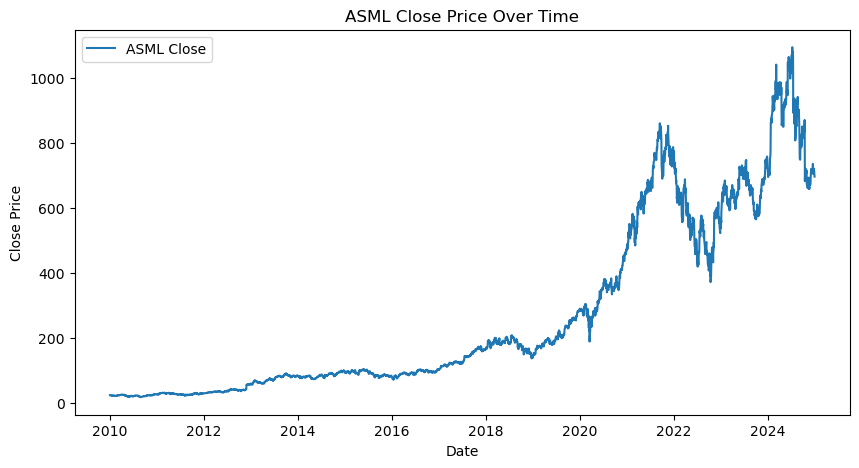

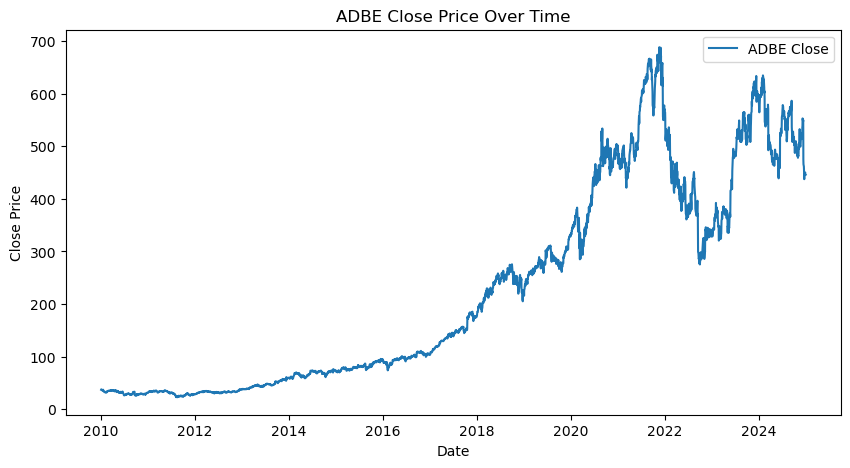

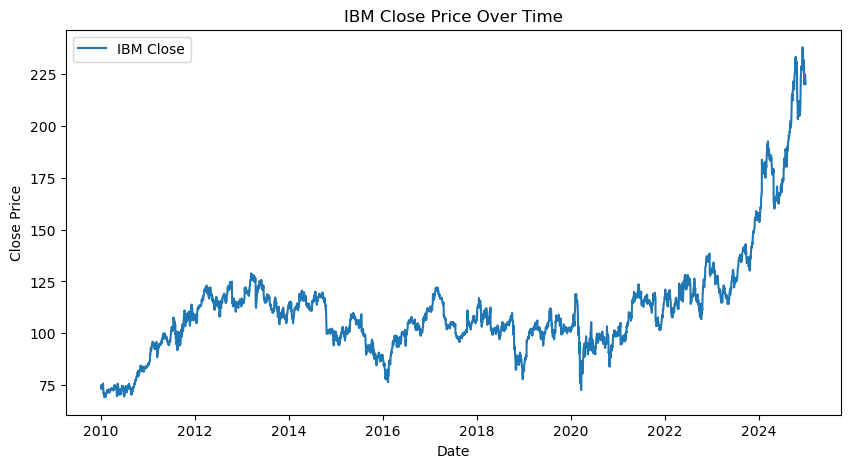

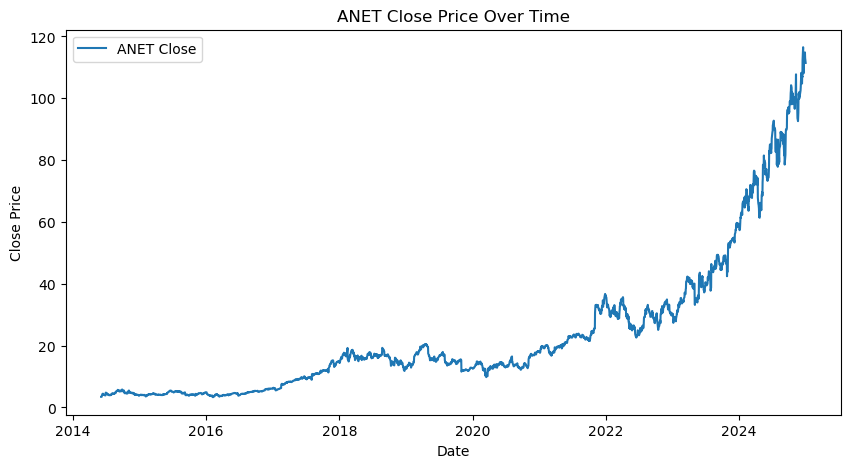

In [47]:
# for ticker in stocks_df:
#     plt.figure(figsize=(10, 5))
#     plt.plot(stocks_df[ticker].index, stocks_df[ticker]['Close'], label=f"{ticker} Close")
#     plt.title(f"{ticker} Close Price Over Time")
#     plt.xlabel("Date")
#     plt.ylabel("Close Price")
#     plt.legend()
#     plt.show()
    
data_df.plot(figsize=(12, 8), title='Close Prices Over Time')